In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
!gdown 1Fxjn1ccPE6sQDmrZWhSjKZUSJzao0-W8

Downloading...
From: https://drive.google.com/uc?id=1Fxjn1ccPE6sQDmrZWhSjKZUSJzao0-W8
To: /content/porter__.zip
100% 4.94M/4.94M [00:00<00:00, 37.1MB/s]


In [ ]:
!unzip porter__.zip

unzip:  cannot find or open porter__.zip, porter__.zip.zip or porter__.zip.ZIP.


In [ ]:
file_path = '/content/porter.csv'
df = pd.read_csv(file_path)

In [ ]:
df.shape

(197428, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
missing_col=df.isna().sum()
missing_col[missing_col>0]

,0
market_id,987
actual_delivery_time,7
store_primary_category,4760
order_protocol,995
total_onshift_partners,16262
total_busy_partners,16262
total_outstanding_orders,16262


In [ ]:
#there were some missing values in actual_delivery_time, we have to create a target column using this column therefore dropping the missingvalues
df = df.dropna(subset='actual_delivery_time')

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols]

,created_at,actual_delivery_time,store_id,store_primary_category
0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american
1,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican
2,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN
3,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN
4,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN
...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich


In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols]

,market_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...
197423,1.0,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,1.0,1,1175,1,535,535,7.0,7.0,12.0


In [ ]:
# Convert datetime columns
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

In [ ]:
# Compute delivery time duration in minutes
df["delivery_time_minutes"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60

In [ ]:
df['delivery_time_minutes'].describe()

,delivery_time_minutes
count,197421.000000
mean,48.470956
std,320.493482
min,1.683333
25%,35.066667
50%,44.333333
75%,56.350000
max,141947.650000


In [ ]:
df = df[df['delivery_time_minutes'] <= 200]

In [ ]:
df['delivery_time_minutes'].describe()

,delivery_time_minutes
count,197320.000000
mean,47.560202
std,18.144347
min,1.683333
25%,35.066667
50%,44.316667
75%,56.333333
max,199.416667


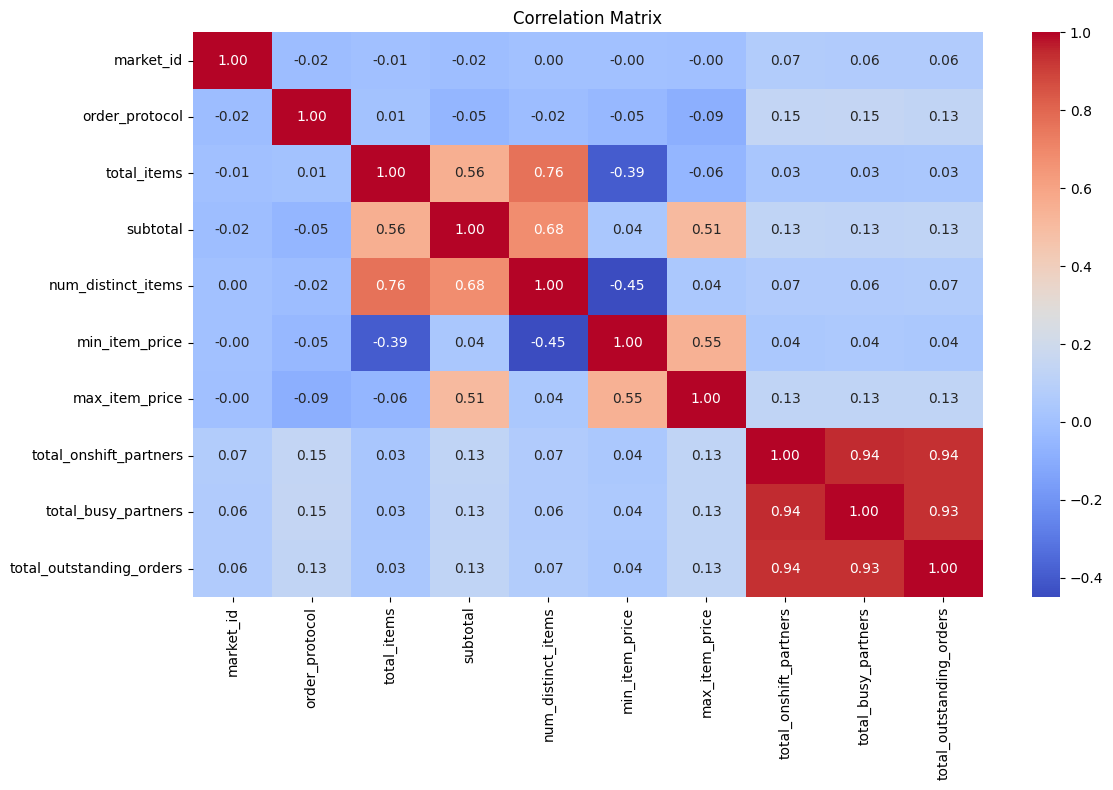

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

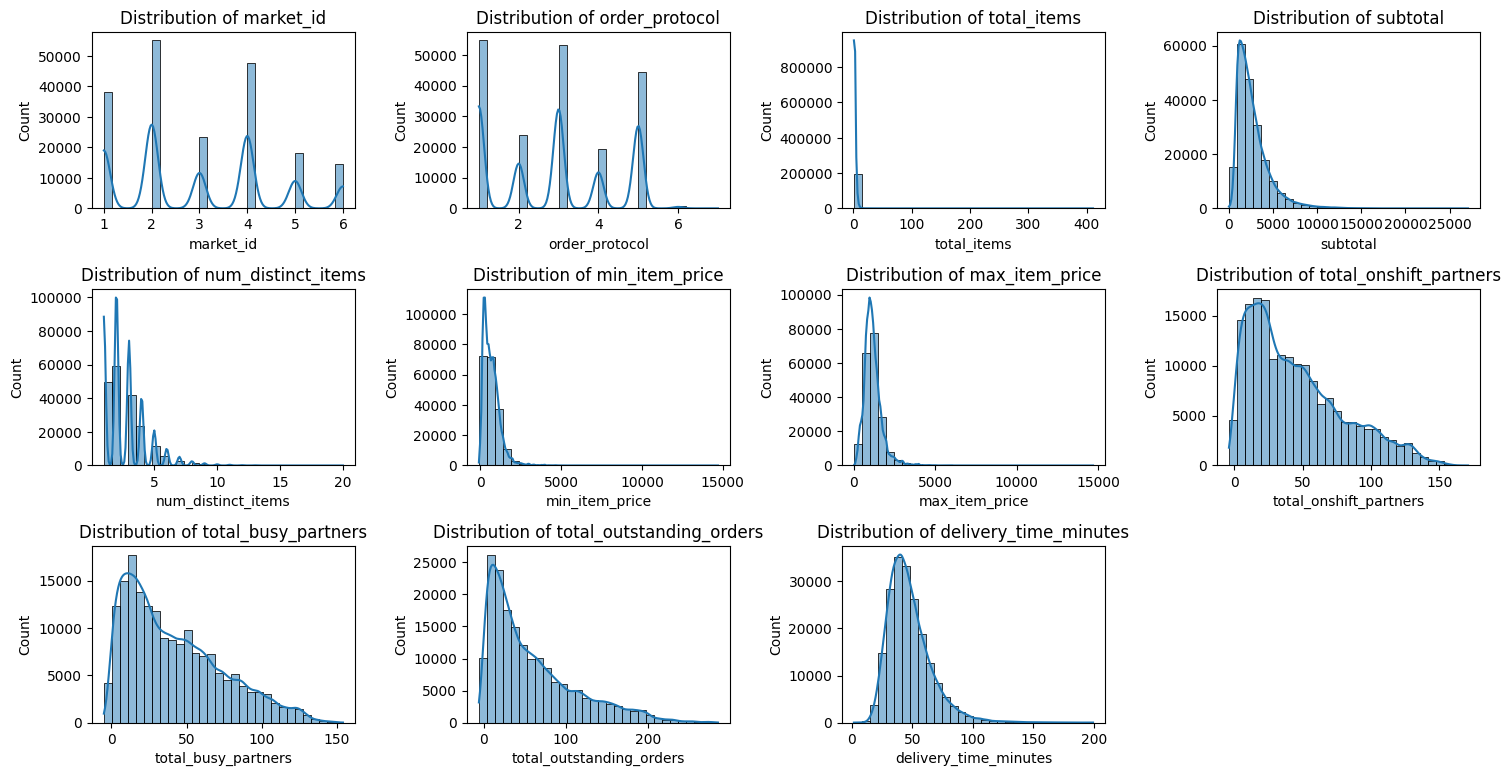

In [ ]:
# Plot distributions of numerical features
numerical_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust based on the number of numerical columns
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [ ]:
df['order_hour'] = df['created_at'].dt.hour
df['order_dayofweek'] = df['created_at'].dt.dayofweek
df['is_weekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df['price_range'] = df['max_item_price'] - df['min_item_price']
# Items diversity ratio
df['item_diversity_ratio'] = np.where(
    df['total_items'] > 0,
    df['num_distinct_items'] / df['total_items'],
    0
)

<ipython-input-18-0e5e3bc642b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_hour'] = df['created_at'].dt.hour
<ipython-input-18-0e5e3bc642b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_dayofweek'] = df['created_at'].dt.dayofweek
<ipython-input-18-0e5e3bc642b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
# Categorize orders by complexity
def categorize_complexity(row):
    # Create a composite score based on items and price range
    complexity_score = (row['total_items'] / 10) + (row['price_range'] / 50) + (row['num_distinct_items'] / 5)
    if complexity_score < 1:
        return 'simple'
    elif complexity_score < 2:
        return 'moderate'
    else:
        return 'complex'

df['order_complexity'] = df.apply(categorize_complexity, axis=1)

<ipython-input-19-1f166aafff81>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_complexity'] = df.apply(categorize_complexity, axis=1)


In [ ]:
df['available_partners'] = np.maximum(0, df['total_onshift_partners'] - df['total_busy_partners'])

<ipython-input-20-0c3b8358c0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['available_partners'] = np.maximum(0, df['total_onshift_partners'] - df['total_busy_partners'])


In [ ]:
# Delivery efficiency - higher is better (more delivery per busy partner)
df['delivery_efficiency'] = np.where(
    df['total_busy_partners'] > 0,
    df['total_items'] / df['total_busy_partners'],
    0
)

<ipython-input-21-59d0a442697d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_efficiency'] = np.where(


In [ ]:
df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)

<ipython-input-22-7f8afd5c58c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['created_at', 'actual_delivery_time'], axis=1, inplace=True)


In [ ]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,...,total_outstanding_orders,delivery_time_minutes,order_hour,order_dayofweek,is_weekend,price_range,item_diversity_ratio,order_complexity,available_partners,delivery_efficiency
0,1.0,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,...,21.0,62.983333,22,4,0,682,1.000000,complex,19.0,0.285714
1,2.0,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,...,2.0,67.066667,21,1,0,0,1.000000,simple,0.0,0.500000
2,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,...,0.0,29.683333,20,3,0,0,1.000000,simple,1.0,0.000000
3,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,...,2.0,51.250000,21,1,0,1200,0.833333,complex,0.0,6.000000
4,3.0,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,...,9.0,39.833333,2,6,1,500,1.000000,complex,0.0,0.500000


In [ ]:
X=df.drop("delivery_time_minutes", axis=1)
y=df['delivery_time_minutes']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_dayofweek,is_weekend,price_range,item_diversity_ratio,order_complexity,available_partners,delivery_efficiency
194953,2.0,635440afdfc39fe37995fed127d7df4f,other,3.0,9,5144,7,199,799,48.0,43.0,62.0,20,4,0,600,0.777778,complex,5.0,0.209302
34982,4.0,2a38a4a9316c49e5a833517c45d31070,sandwich,5.0,10,9137,8,749,899,31.0,16.0,13.0,18,3,0,150,0.800000,complex,15.0,0.625000
21562,3.0,cb3213ada48302953cb0f166464ab356,mexican,1.0,5,3720,5,430,1095,32.0,32.0,40.0,0,0,0,665,1.000000,complex,0.0,0.156250
65070,4.0,7d2b92b6726c241134dae6cd3fb8c182,bubble-tea,5.0,3,1520,3,400,420,73.0,72.0,137.0,3,1,0,20,1.000000,moderate,1.0,0.041667
4303,4.0,3416a75f4cea9109507cacd8e2f2aefc,indian,3.0,4,4040,3,425,1595,70.0,71.0,108.0,2,1,0,1170,0.750000,complex,0.0,0.056338


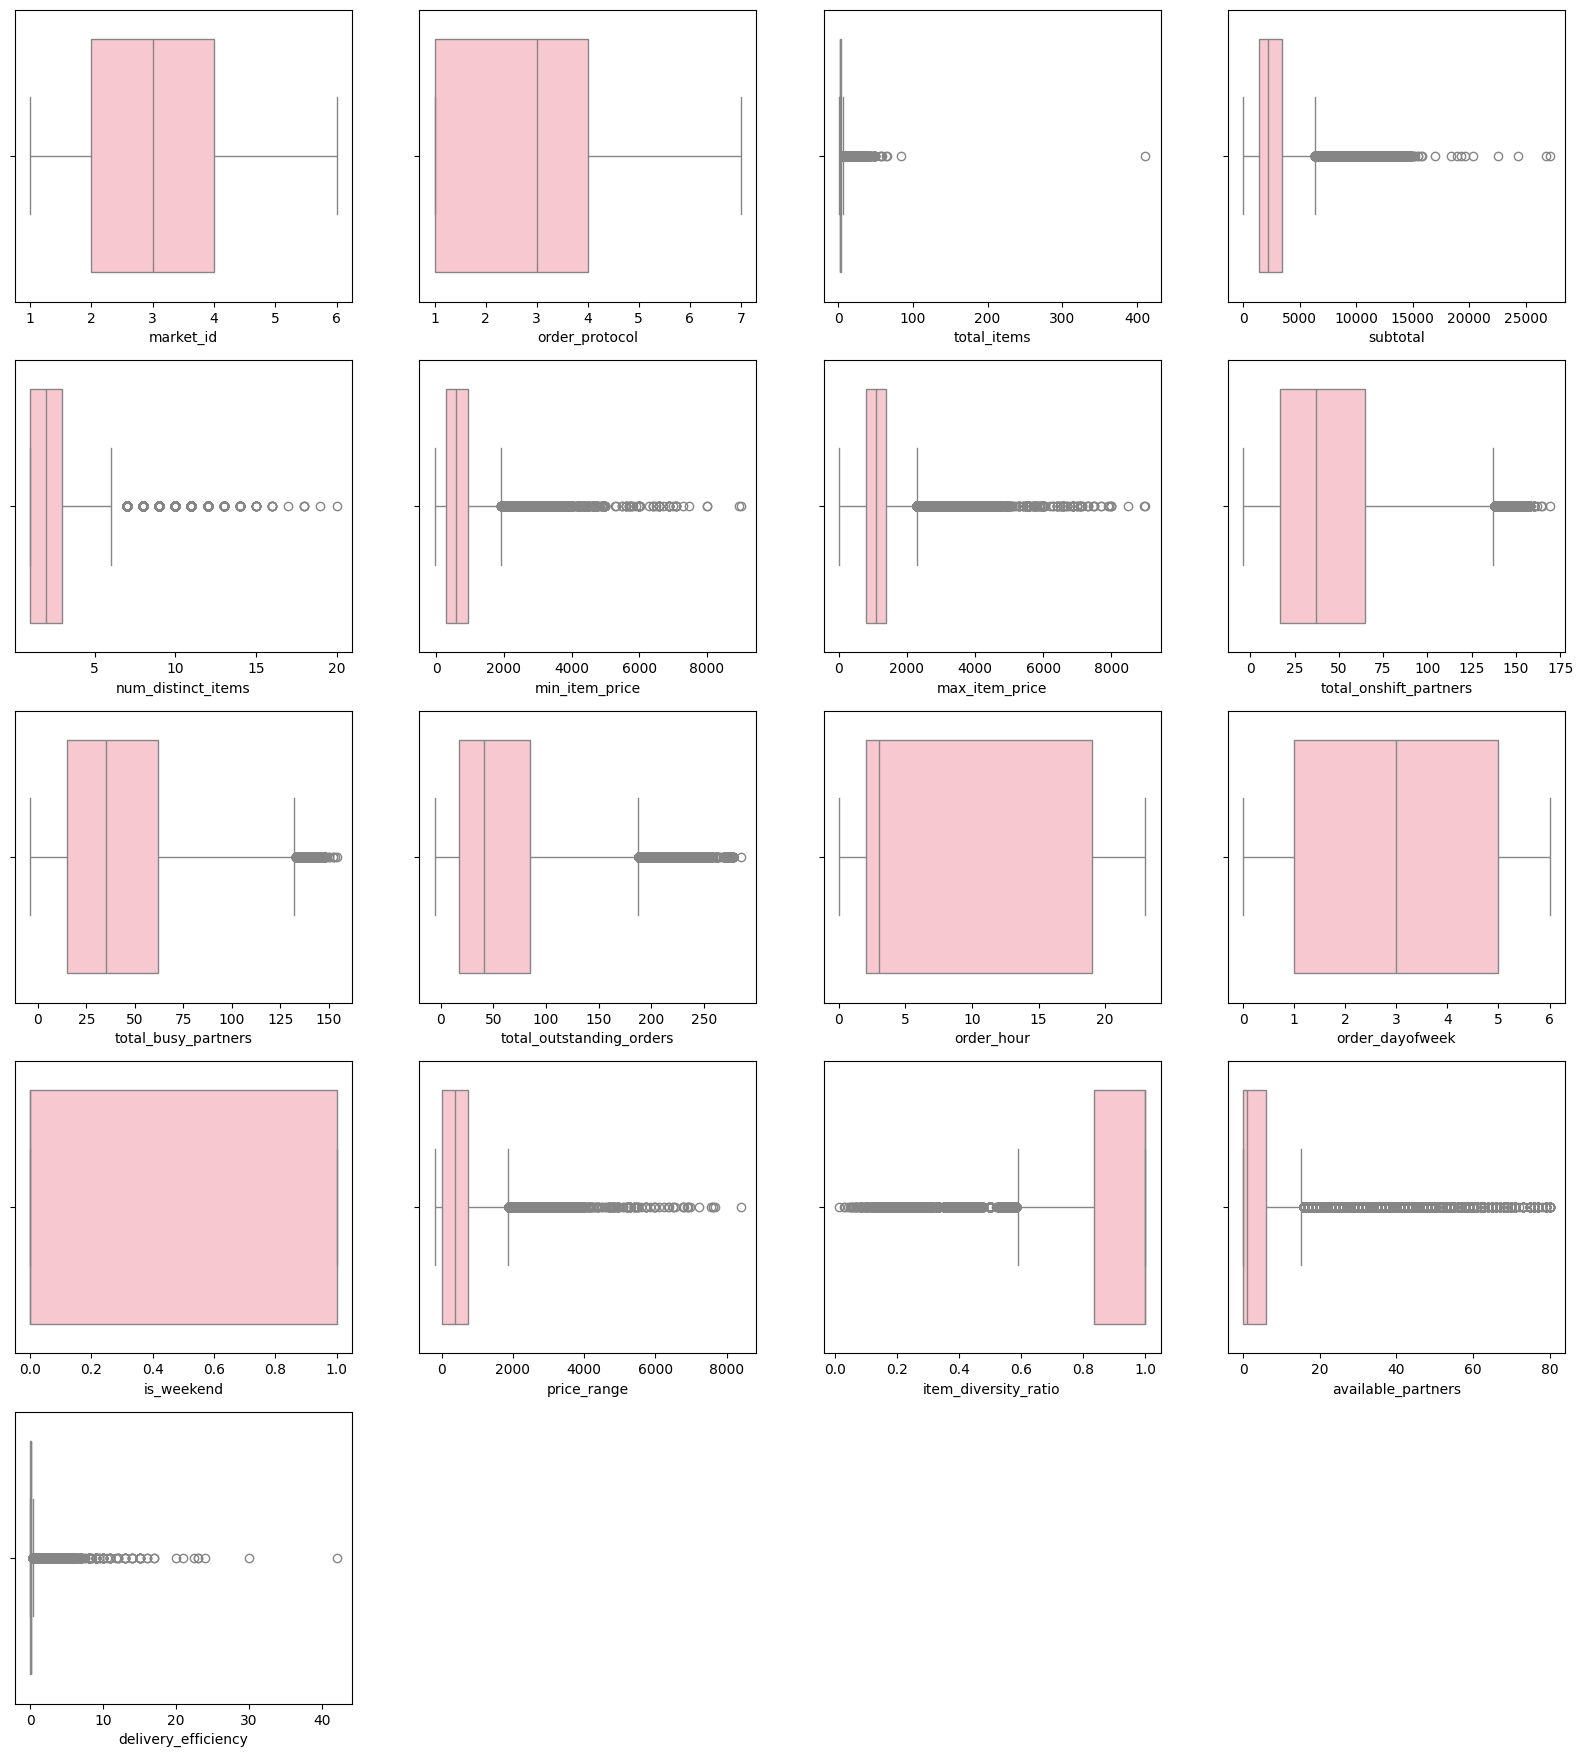

In [ ]:
plt.figure(figsize=(20,22))
for j in range(len(X_train.select_dtypes(include=['float', 'int']).columns)):
    plt.subplot(5,4,j+1)
    sns.boxplot(x=X_train[X_train.select_dtypes(include=['float', 'int']).columns[j]], color='pink')
plt.show()

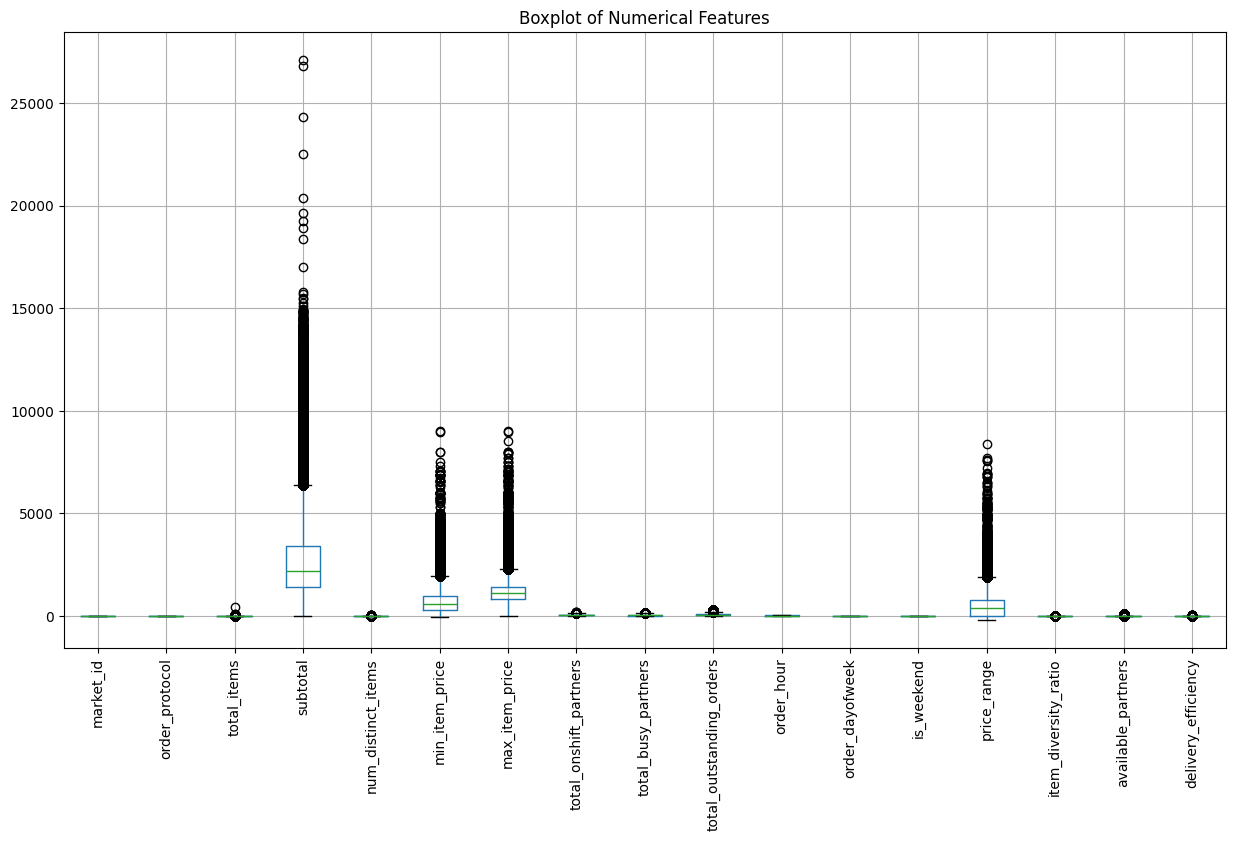

Outlier counts per column:
 delivery_efficiency         17281
item_diversity_ratio        14830
available_partners          12728
total_items                  7621
subtotal                     7232
max_item_price               6178
num_distinct_items           4733
total_outstanding_orders     4222
min_item_price               3670
price_range                  2678
total_onshift_partners       1190
total_busy_partners           500
market_id                       0
order_protocol                  0
is_weekend                      0
order_hour                      0
order_dayofweek                 0
dtype: int64


In [ ]:
# Selecting numerical columns
numerical_cols = X_train.select_dtypes(include=[np.number])

# Boxplot for all numerical columns
plt.figure(figsize=(15, 8))
numerical_cols.boxplot(rot=90)  # Rotate labels for visibility
plt.title("Boxplot of Numerical Features")
plt.show()

# IQR method to detect outliers
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)

print("Outlier counts per column:\n", outlier_counts)

In [ ]:
X_train.select_dtypes(include='object')

,store_id,store_primary_category,order_complexity
194953,635440afdfc39fe37995fed127d7df4f,other,complex
34982,2a38a4a9316c49e5a833517c45d31070,sandwich,complex
21562,cb3213ada48302953cb0f166464ab356,mexican,complex
65070,7d2b92b6726c241134dae6cd3fb8c182,bubble-tea,moderate
4303,3416a75f4cea9109507cacd8e2f2aefc,indian,complex
...,...,...,...
152396,184260348236f9554fe9375772ff966e,pizza,complex
177055,71f78523376fc3eb23be9316f6f6126e,NaN,simple
118018,95c9d994f8d75d4d60f8bb8f25902339,japanese,simple
173775,92c2425736b1065fa04616737b9e41b5,breakfast,complex


In [ ]:
outlier_col_train=X_train.drop(['market_id', 'order_protocol', 'is_weekend', 'order_hour', 'order_dayofweek', 'store_id', 'store_primary_category',
                                'order_complexity'], axis=1)

In [ ]:
# Handling outliers by capping them to the lower and upper bounds
for column in outlier_col_train.columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_train[column] = np.where(X_train[column] < lower_bound, lower_bound, X_train[column])
    X_train[column] = np.where(X_train[column] > upper_bound, upper_bound, X_train[column])

# Verifying if outliers are handled
outliers_after_handling = {}
for column in outlier_col_train.columns:
    Q1 = X_train[column].quantile(0.25)
    Q3 = X_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_handling[column] = ((X_train[column] < lower_bound) | (X_train[column] > upper_bound)).sum()

outliers_after_handling

{'total_items': np.int64(0),
 'subtotal': np.int64(0),
 'num_distinct_items': np.int64(0),
 'min_item_price': np.int64(0),
 'max_item_price': np.int64(0),
 'total_onshift_partners': np.int64(0),
 'total_busy_partners': np.int64(0),
 'total_outstanding_orders': np.int64(0),
 'price_range': np.int64(0),
 'item_diversity_ratio': np.int64(0),
 'available_partners': np.int64(0),
 'delivery_efficiency': np.int64(0)}

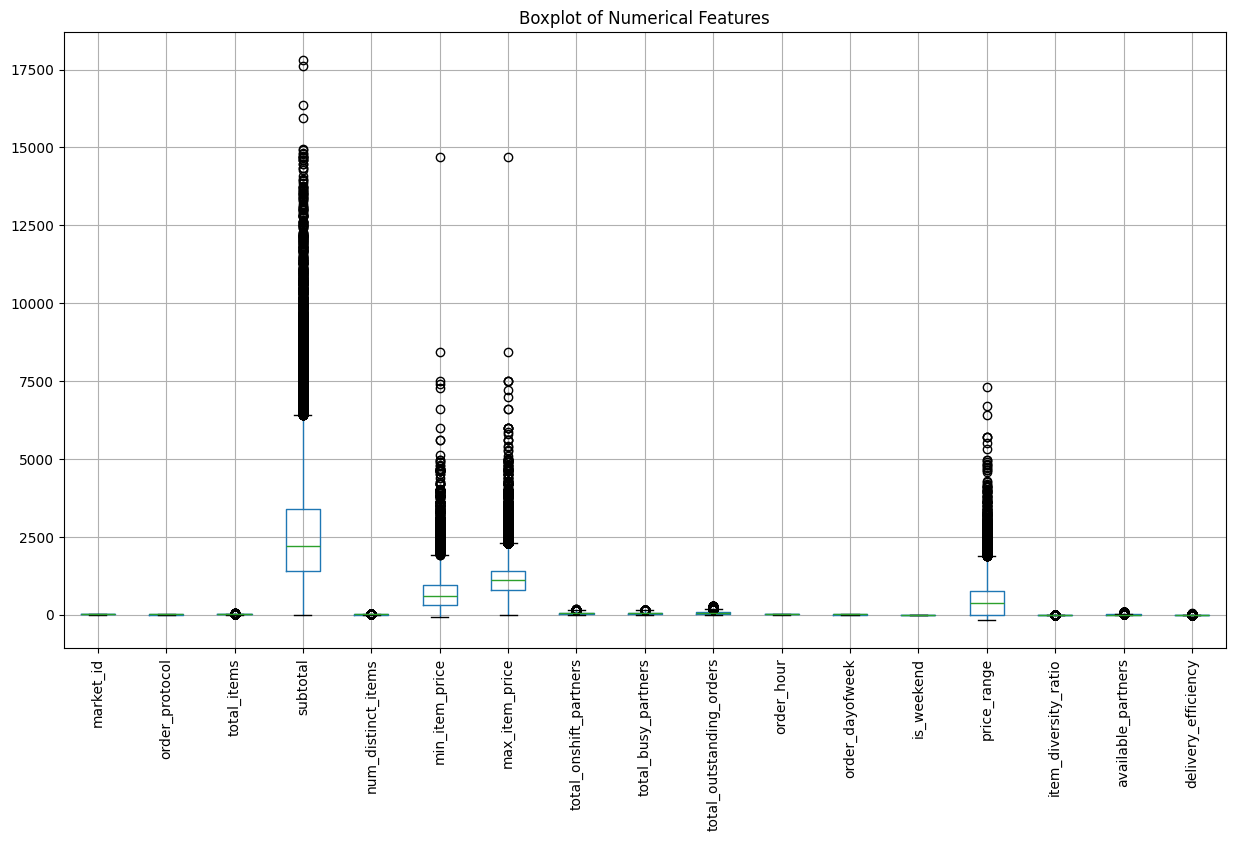

Outlier counts per column:
 delivery_efficiency         4371
item_diversity_ratio        4307
available_partners          3192
total_items                 1959
subtotal                    1793
max_item_price              1547
num_distinct_items          1183
total_outstanding_orders    1177
min_item_price               926
price_range                  681
total_onshift_partners       312
total_busy_partners          106
market_id                      0
order_protocol                 0
is_weekend                     0
order_hour                     0
order_dayofweek                0
dtype: int64


In [ ]:
# Selecting numerical columns
numerical_cols= X_test.select_dtypes(include=[np.number])

# Boxplot for all numerical columns
plt.figure(figsize=(15, 8))
numerical_cols.boxplot(rot=90)  # Rotate labels for visibility
plt.title("Boxplot of Numerical Features")
plt.show()

# IQR method to detect outliers
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum().sort_values(ascending=False)

print("Outlier counts per column:\n", outlier_counts)

In [ ]:
outlier_col_test=X_test.drop(['market_id', 'order_protocol', 'is_weekend', 'order_hour', 'order_dayofweek', 'store_id', 'store_primary_category',
                                'order_complexity'], axis=1)

In [ ]:
# Handling outliers by capping them to the lower and upper bounds
for column in outlier_col_test.columns:
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_test[column] = np.where(X_test[column] < lower_bound, lower_bound, X_test[column])
    X_test[column] = np.where(X_test[column] > upper_bound, upper_bound, X_test[column])

# Verifying if outliers are handled
outliers_after_handling = {}
for column in outlier_col_test.columns:
    Q1 = X_test[column].quantile(0.25)
    Q3 = X_test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_after_handling[column] = ((X_test[column] < lower_bound) | (X_test[column] > upper_bound)).sum()

outliers_after_handling

{'total_items': np.int64(0),
 'subtotal': np.int64(0),
 'num_distinct_items': np.int64(0),
 'min_item_price': np.int64(0),
 'max_item_price': np.int64(0),
 'total_onshift_partners': np.int64(0),
 'total_busy_partners': np.int64(0),
 'total_outstanding_orders': np.int64(0),
 'price_range': np.int64(0),
 'item_diversity_ratio': np.int64(0),
 'available_partners': np.int64(0),
 'delivery_efficiency': np.int64(0)}

# Checking the Missing Values

In [ ]:
X_train_missing = X_train.isna().sum()
X_train_missing[X_train_missing > 0]

,0


In [ ]:
X_test_missing = X_test.isna().sum()
X_test_missing[X_test_missing > 0]

,0


# Filling the missing values

In [ ]:
num_cols_fill = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders', 'available_partners']

In [ ]:
def MICE (df, columns):
  mice_imputer = IterativeImputer(random_state=42, max_iter=10)
  mice_imputed = mice_imputer.fit_transform(df[columns])
  for i, col in enumerate(columns):
      df[col] = mice_imputed[:, i]

In [ ]:
MICE(X_train, num_cols_fill )

In [ ]:
MICE(X_test, num_cols_fill )

In [ ]:
num_cols = ["market_id", "order_protocol"]
X_train[num_cols] = X_train[num_cols].apply(lambda x: x.fillna(x.median()))
X_test[num_cols] = X_test[num_cols].apply(lambda x: x.fillna(x.median()))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import joblib

# Define the encoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit and transform training data
X_train['store_primary_category'] = encoder.fit_transform(X_train[['store_primary_category']])

# Save encoder to file
with open("ordinal_encoder.pkl", "wb") as f:
    joblib.dump(encoder, f)

X_test['store_primary_category'] = encoder.transform(X_test[['store_primary_category']])


In [ ]:
df['store_primary_category'].unique()

array(['american', 'mexican', nan, 'indian', 'italian', 'sandwich',
       'thai', 'cafe', 'salad', 'pizza', 'chinese', 'singaporean',
       'burger', 'breakfast', 'mediterranean', 'japanese', 'greek',
       'catering', 'filipino', 'convenience-store', 'other', 'korean',
       'vegan', 'asian', 'barbecue', 'fast', 'dessert', 'smoothie',
       'seafood', 'vietnamese', 'cajun', 'steak', 'middle-eastern',
       'soup', 'vegetarian', 'persian', 'nepalese', 'sushi',
       'latin-american', 'hawaiian', 'chocolate', 'burmese', 'british',
       'pasta', 'alcohol', 'dim-sum', 'peruvian', 'turkish', 'malaysian',
       'ethiopian', 'afghan', 'bubble-tea', 'german', 'french',
       'caribbean', 'gluten-free', 'comfort-food', 'gastropub',
       'pakistani', 'moroccan', 'spanish', 'southern', 'tapas', 'russian',
       'brazilian', 'european', 'cheese', 'african', 'argentine',
       'kosher', 'irish', 'lebanese', 'belgian', 'indonesian',
       'alcohol-plus-food'], dtype=object)

In [ ]:

# Fill missing values in categorical columns with mode
cat_cols = ["store_primary_category"]
X_train[cat_cols] = X_train[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))
X_test[cat_cols] = X_test[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
X_train_missing = X_train.isna().sum()
X_train_missing[X_train_missing > 0]

,0


In [ ]:

X_test_missing = X_test.isna().sum()
X_test_missing[X_test_missing > 0]

,0


# Encoding

In [ ]:
freq_map_store_id = X_train['store_id'].value_counts(normalize=True).to_dict()
with open("store_id_freq_map.pkl", "wb") as f:
    joblib.dump(freq_map_store_id, f)

In [ ]:
# Use the map to encode both train and test
X_train['store_id'] = X_train['store_id'].map(freq_map_store_id)
X_test['store_id'] = X_test['store_id'].map(freq_map_store_id)

X_test['store_id'].fillna(0, inplace=True)

<ipython-input-47-4ea087d67d08>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['store_id'].fillna(0, inplace=True)


In [ ]:
#  Ordinal Encoding for order_complexity
complexity_mapping = {
    'simple': 0,
    'moderate': 1,
    'complex': 2
}

with open('order_complexity_map.pkl', 'wb')as f:
  joblib.dump(complexity_mapping, f)

X_train['order_complexity'] = X_train['order_complexity'].map(complexity_mapping)
X_test['order_complexity'] = X_test['order_complexity'].map(complexity_mapping)

In [ ]:
X_train.dtypes

,0
market_id,float64
store_id,float64
store_primary_category,float64
order_protocol,float64
total_items,float64
subtotal,float64
num_distinct_items,float64
min_item_price,float64
max_item_price,float64
total_onshift_partners,float64


In [ ]:
X_test.head()

,market_id,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_dayofweek,is_weekend,price_range,item_diversity_ratio,order_complexity,available_partners,delivery_efficiency
159651,2.0,0.000963,35.0,3.0,1.0,799.0,1.0,799.0,799.0,47.0,46.0,96.0,4,6,1,0.0,1.000000,0,1.0,0.021739
43794,5.0,0.000291,55.0,3.0,2.0,4320.0,2.0,960.0,1200.0,4.0,4.0,6.0,18,5,1,240.0,1.000000,2,0.0,0.350619
36778,2.0,0.000127,2.0,3.0,6.0,5194.0,6.0,599.0,1099.0,96.0,94.0,116.0,1,6,1,500.0,1.000000,2,2.0,0.063830
164994,2.0,0.000361,72.0,1.0,3.0,2985.0,3.0,795.0,1095.0,85.0,74.0,108.0,1,6,1,300.0,1.000000,2,11.0,0.040541
30390,4.0,0.001387,49.0,5.0,6.0,3496.0,4.0,150.0,799.0,95.0,55.0,71.0,1,5,1,649.0,0.666667,2,15.0,0.109091


In [ ]:
X_test.isna().sum()

,0
market_id,0
store_id,0
store_primary_category,0
order_protocol,0
total_items,0
subtotal,0
num_distinct_items,0
min_item_price,0
max_item_price,0
total_onshift_partners,0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:

# # Define the vanilla neural network model
# model = Sequential([
#     Dense(14, kernel_initializer='normal', activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(128, activation='relu'),
#     Dense(32, activation='relu'),
#     Dense(1)  # Output layer
# ])

# # Compile the model with MAPE metric
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='Huber',  # Mean Squared Error as loss function
#               metrics=['mape'])  # Mean Absolute Percentage Error as evaluation metric

# # Print model summary
# model.summary()

In [ ]:
# history = model.fit(
#     X_train_scaled, y_train,
#     epochs=30,  # Number of training epochs
#     batch_size=512,# Batch size
#     validation_split=0.2,
#     verbose=1  # Show training progress
# )


In [ ]:
# test_loss, test_mape = model.evaluate(X_test_scaled, y_test)
# print(f"Test Loss: {test_loss:.2f}, Test MAPE: {test_mape:.2f}")

In [ ]:
# print(history.history.keys())

In [ ]:
# # Plot training & validation loss (MSE)

# plt.figure(figsize=(12, 5))

# # Plot Loss
# plt.subplot(1, 2, 1)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss (MSE)')
# plt.title('Training & Validation Loss')
# plt.legend()

# # Plot MAPE
# plt.subplot(1, 2, 2)
# plt.plot(history.history['mape'], label='Train MAPE')
# plt.plot(history.history['val_mape'], label='Validation MAPE')
# plt.xlabel('Epochs')
# plt.ylabel('MAPE')
# plt.title('Training & Validation MAPE')
# plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:

from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import AdamW

# Define the updated model with ReLU
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(64, activation='relu'),
    BatchNormalization(),

    Dense(1, activation='linear')  # Regression output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Optimizer with Weight Decay
optimizer = Adam(learning_rate=1e-4, weight_decay=1e-4)

# Compile model
model.compile(optimizer=optimizer, loss='Huber', metrics=['mape'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.001, verbose=1)
early_stopping = EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True, verbose=1)

In [ ]:

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=60,
    batch_size=64,  # Try a larger batch size
    validation_split=0.2,
    verbose=1,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 45.8861 - mape: 97.4741 - val_loss: 38.7958 - val_mape: 80.5112 - learning_rate: 1.0000e-04
Epoch 2/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 36.3497 - mape: 75.2313 - val_loss: 24.0577 - val_mape: 46.5807 - learning_rate: 1.0000e-04
Epoch 3/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 20.7256 - mape: 39.6353 - val_loss: 12.3878 - val_mape: 24.9692 - learning_rate: 1.0000e-04
Epoch 4/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 12.0130 - mape: 25.2378 - val_loss: 11.2608 - val_mape: 25.5257 - learning_rate: 1.0000e-04
Epoch 5/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 11.4226 - mape: 25.8960 - val_loss: 11.1676 - val_mape: 25.4785 - learning_rate: 1.0000e-04
Epoch 6/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 11.3825 - mape: 25.8781 - val_loss: 11.1126 - val_mape: 25.2627 - learning_rate: 1.0000e-04
Epoch 7/60
1974/1974 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 11.2988 - 

In [ ]:
import numpy as np

print("X_test NaNs:", np.isnan(X_test_scaled).sum())
print("X_test Infs:", np.isinf(X_test_scaled).sum())

print("y_test NaNs:", np.isnan(y_test).sum())
print("y_test Infs:", np.isinf(y_test).sum())


X_test NaNs: 0
X_test Infs: 0
y_test NaNs: 0
y_test Infs: 0


In [ ]:
# Evaluate on test data
test_loss, test_mape = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test MAPE: {test_mape}")

1234/1234 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 10.9062 - mape: 24.7556
Test Loss: 10.841442108154297, Test MAPE: 24.76734733581543


In [ ]:
model.save("delivery_time_model.h5")


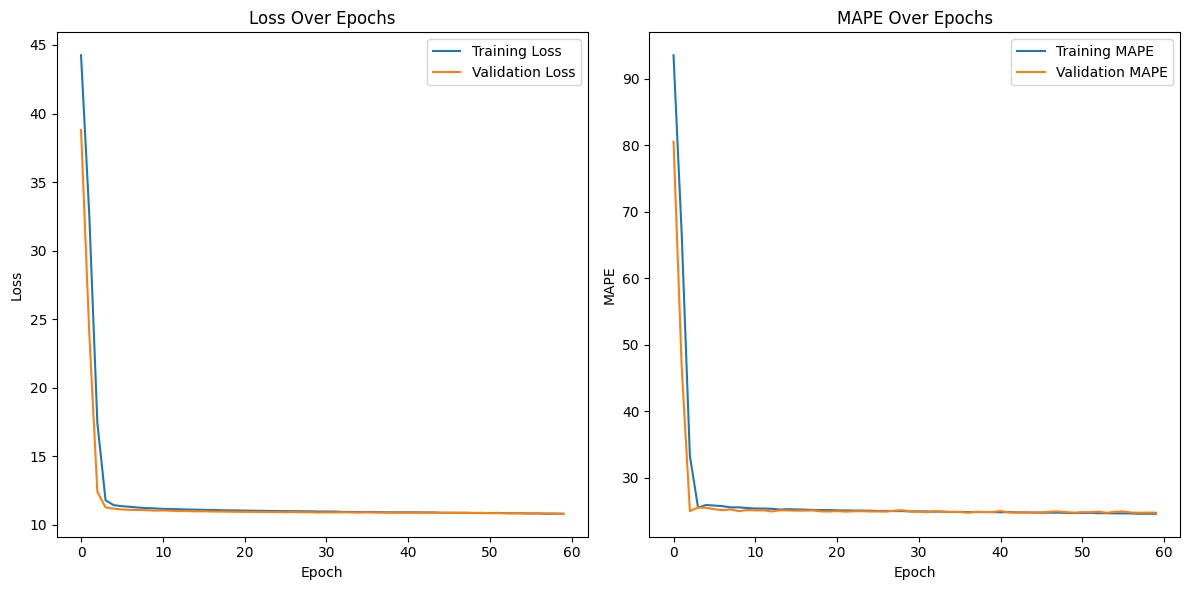

In [ ]:
# Visualize training and validation loss
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mape'], label='Training MAPE')
plt.plot(history.history['val_mape'], label='Validation MAPE')
plt.title('MAPE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()

plt.tight_layout()
plt.show()